In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
file_path = "cardata.csv"
data = pd.read_csv(file_path)

In [5]:
# Drop unnecessary columns
data.drop(['Car_Name'], axis=1, inplace=True)


In [9]:
# Convert categorical variables into numerical format
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
encoder = OneHotEncoder(drop='first', sparse_output=False)

categorical_encoded = encoder.fit_transform(data[categorical_cols])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

data = pd.concat([data.drop(categorical_cols, axis=1), categorical_encoded], axis=1)


In [11]:
# Define features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Train model (Random Forest Regressor for better accuracy)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Predict on test data
y_pred = model.predict(X_test)

In [23]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.6020245901639346
Mean Squared Error (MSE): 0.8390054309836057
R-squared (R2): 0.9635778536357699


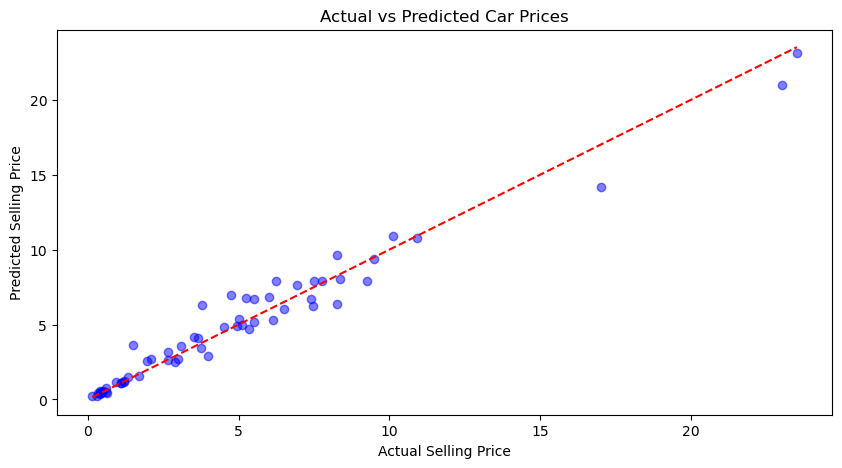

In [25]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()
